In [51]:
import numpy as np
import pandas as pd 

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区所占比例
* CHAS 房屋是否是位于河边的 如果位于河边则值为1 否则值为0
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比率
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税收额度
* PTRATIO 房屋所在镇师生的比例
* B 是一个计算公式 ： 1000 * （房屋所在镇非美籍人口所占比率 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MDEV 房屋的平均价格

In [71]:
data = pd.read_csv(r"boston.csv")
data.drop(columns='Unnamed: 0', inplace=True)
# data
# 查看数据的基本信息 同时 也可以用来查看 各个特征列是否存在缺失值
# data.info() 经过查看 一共506行 所有属性506行都是有值的
# data.duplicated().any() False 没有重复值

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [66]:
class LinearRegression:
    """使用python实现的线性回归 (最小二乘法)"""
    def fit(self, X, y):
        """根据提供的训练数据X 对模型进行训练
        
        Parameters
        ------
        X : 类数组类型 形状 ：[样本数量，特征数量]
            特征矩阵， 用来对模型进行训练
            
        y ：类数组类型 形状 : [样本数量]
        
        """
        # 说明： 如果X是数组对象的一部分 而不是完整的对象数据（例如：X是由其它对象通过切片传递过来的）
        # 则无法完成矩阵的转换
        # 这里创建X的拷贝对象 避免创建转换矩阵的时候失败
        X = np.asmatrix(X.copy())
        # y不需要拷贝 是一维结构 可能是一个行向量或者列向量 可以不用拷贝
        # 注意 ：转换完矩阵还要进行一个reshape 参数 -1 代表该维度的大小由 NumPy 依据数组的总元素数量和其他维度的大小自动计算得出
        y = np.asmatrix(y).reshape(-1, 1)
        # 通过最小二乘公式 求解出最佳的权重值
        self.w_ = (X.T * X).I * X.T * y

    def predict(self, X):
        """根据参数传递的样本X, 对样本数据进行预测
        
        Parameters
        ------
        X : 类数组类型 形状 ：[样本数量，特征数量]
            待预测的样本特征(属性)
        
        Returns
        ------
        result: 数组类型 
               预测的结果
            
        """
        # 将X转换成矩阵 注意 需要对X进行拷贝
        X = np.asmatrix(X.copy())
        result = X * self.w_
        # 将result矩阵转换成ndarray数组 进行扁平化处理 然后返回结果
        # 使用ravel可以将数组进行扁平化处理
        return np.array(result).ravel()

In [73]:
# 不考虑截距
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
# 查看模型的权重值
display(lr.w_)

17.011905533634504

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [79]:
# 考虑截距 增加一列并令该列的所有值都是1
t = data.sample(len(data),random_state=0)
# 可以这样增加一列
# t["Intercept"] = 1
# 按照习惯 截距作为w0 我们就为他配上一个x0 放在最前面
new_columns = t.columns.insert(0, "Intercept")
t = t.reindex(columns=new_columns, fill_value=1)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
display(lr.w_)

17.097531384668372

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

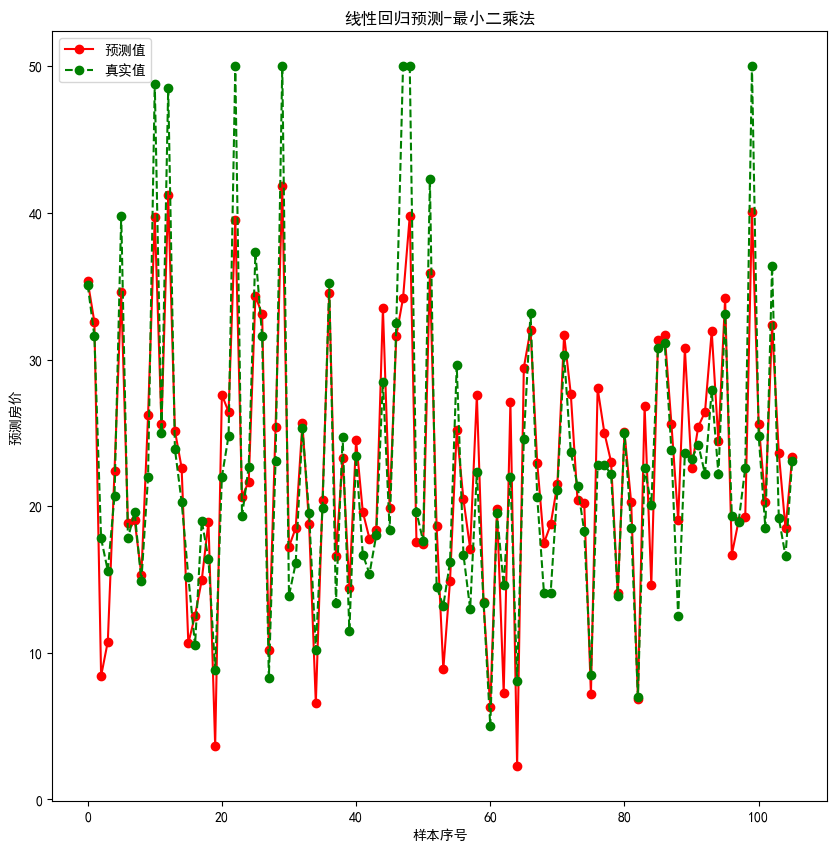

In [81]:
plt.figure(figsize=(10,10))
# 绘制预测值
plt.plot(result, "ro-",label="预测值")
# 绘制真实值
plt.plot(test_y.values,"go--",label="真实值")
plt.title("线性回归预测-最小二乘法")
plt.xlabel("样本序号")
plt.ylabel("预测房价")
plt.legend()
plt.show()